In [66]:
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

#### Dataset
https://www.kaggle.com/shaistashaikh/carprice-assignment

* Here we will use the same dataset as we used in linear regression

In [67]:
car_data = pd.read_csv('datasets/CarPrice_Assignment.csv')

car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Text(0.5, 1.0, 'Curbweight vs. Price')

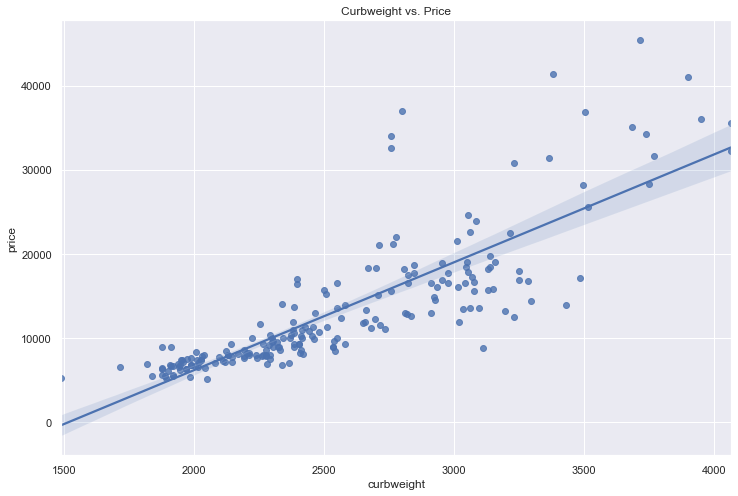

In [68]:
plt.figure(figsize=(12, 8))

sns.regplot(data=car_data, x='curbweight', y='price')

plt.title('Curbweight vs. Price')

Text(0.5, 1.0, 'Car Body vs. Price')

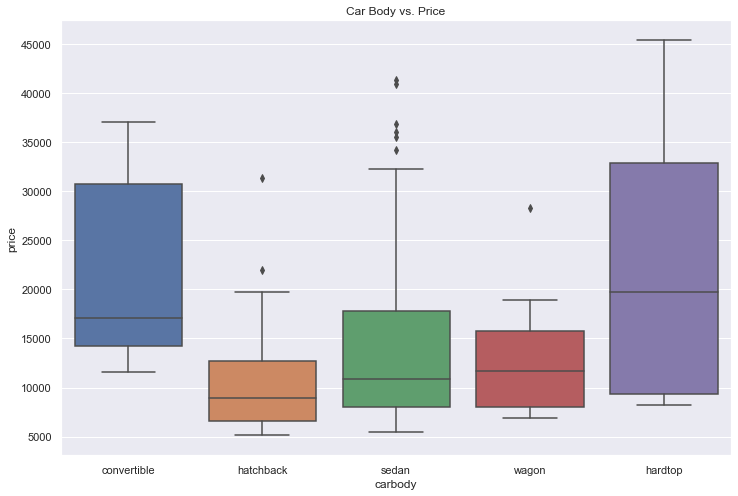

In [69]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=car_data, x='carbody', y='price')

plt.title('Car Body vs. Price')

In [70]:
data_corr = car_data[['enginesize', 'boreratio', 'stroke', 'compressionratio',
                      'peakrpm', 'citympg','highwaympg', 'price' ]].corr()

data_corr

,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,highwaympg,price
enginesize,1.000000,0.583774,0.203129,0.028971,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.583774,1.000000,-0.055909,0.005197,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.203129,-0.055909,1.000000,0.186110,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.028971,0.005197,0.186110,1.000000,-0.435741,0.324701,0.265201,0.067984
peakrpm,-0.244660,-0.254976,-0.067964,-0.435741,1.000000,-0.113544,-0.054275,-0.085267
citympg,-0.653658,-0.584532,-0.042145,0.324701,-0.113544,1.000000,0.971337,-0.685751
highwaympg,-0.677470,-0.587012,-0.043931,0.265201,-0.054275,0.971337,1.000000,-0.697599
price,0.874145,0.553173,0.079443,0.067984,-0.085267,-0.685751,-0.697599,1.000000


Text(0.5, 1.0, 'Correlations')

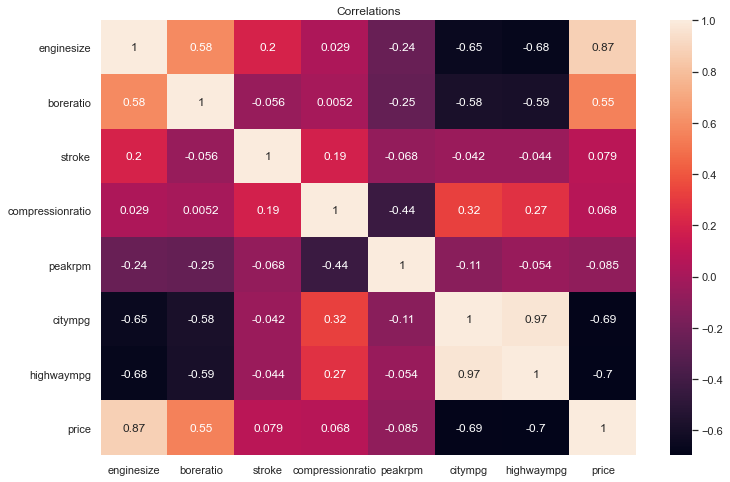

In [71]:
plt.figure(figsize=(12, 8))

sns.heatmap(data=data_corr, annot=True)

plt.title('Correlations')

In [72]:
cols = ['aspiration', 'doornumber',
        'enginelocation', 'fueltype']

car_data[cols].sample(10)

,aspiration,doornumber,enginelocation,fueltype
115,std,four,front,gas
102,std,four,front,gas
103,std,four,front,gas
163,std,two,front,gas
75,turbo,two,front,gas
8,turbo,four,front,gas
183,std,two,front,gas
177,std,four,front,gas
69,turbo,two,front,diesel
37,std,two,front,gas


In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cols:
    car_data[col] = le.fit_transform(car_data[col])

In [74]:
car_data[cols].sample(10)

,aspiration,doornumber,enginelocation,fueltype
118,0,1,0,1
64,0,0,0,1
63,0,0,0,0
174,1,0,0,0
198,1,0,0,1
142,0,0,0,1
94,0,1,0,1
200,0,0,0,1
197,0,0,0,1
182,0,1,0,0


#### Dummy Encoding

In [75]:
car_data = car_data.drop(columns=['CarName', 'car_ID'])

car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,sedan,fwd,0,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,sedan,4wd,0,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [76]:
cat_columns = ['carbody', 'enginetype', 'drivewheel', 'cylindernumber', 'fuelsystem']
    
for col in cat_columns:
    car_data = pd.concat([car_data.drop(col, axis = 1),
                          pd.get_dummies(car_data[col],
                                         prefix = col, 
                                         prefix_sep = '_',
                                         drop_first = True)], axis=1)

In [77]:
car_data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [79]:
car_data = car_data.sample(frac=1).reset_index(drop=True)

### Divide the dataset into x and y

In [80]:
X = car_data.drop(['price'], axis = 1)

y = car_data['price']

In [81]:
X = sm.add_constant(X)

X.head()

,const,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,2,1,0,1,0,98.4,176.2,65.6,52.0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,2,1,0,1,0,96.0,172.6,65.2,51.4,...,0,0,0,0,0,0,0,0,0,1
2,1.0,-1,1,0,0,0,115.6,202.6,71.7,56.5,...,0,0,0,0,0,0,0,1,0,0
3,1.0,2,1,0,1,0,97.3,171.7,65.5,55.7,...,0,0,0,0,0,0,0,1,0,0
4,1.0,1,1,1,1,0,93.7,157.3,63.8,50.6,...,0,0,0,0,0,0,0,1,0,0


* Splitting X and Y into test and train in 80,20 ratio

In [82]:
train_size = int(0.8 * len(X))

X_train_set = X[:train_size]
y_train_set = y[:train_size]

X_test_set = X[train_size:]
y_test_set = y[train_size:]

In [83]:
X_train_set.shape, X_test_set.shape

((164, 44), (41, 44))

In [84]:
y_train_set.shape, y_test_set.shape

((164,), (41,))

#### Implementing regression

In [85]:
model = sm.OLS(y_train_set, X_train_set).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     41.24
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.98e-54
Time:                        16:28:41   Log-Likelihood:                -1471.3
No. Observations:                 164   AIC:                             3027.
Df Residuals:                     122   BIC:                             3157.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.03e+04   1.24e+04     -0.833      0.406   -3.48e+04    1.42e+04
symboling              -290.3100    277.824     -1.045      0.298    -840.290     259.670
fueltype              -9596.5409   7119.569     -1.348      0.180   -2.37e+04    4497.358
aspiration              812.1639   1169.119      0.695      0.489   -1502.224    3126.552
doornumber              412.9570    651.601      0.634      0.527    -876.953    1702.867
enginelocation         7114.3903   2853.650      2.493      0.014    1465.305    1.28e+04
wheelbase                26.4251    111.189      0.238      0.813    -193.684     246.535
carlength               -84.0510     54.553     -1.541      0.126    -192.044      23.942
carwidth                478.1599    289.482      1.652      0.101     -94.898    1051.218
carheight                68.8006    141.785      0.485      0.628    -211.878     349.479
curbweight                5.9511      2.085      2.854      0.005       1.823      10.079
enginesize               77.6697     34.527      2.250      0.026       9.319     146.020
boreratio             -1106.7769   1747.162     -0.633      0.528   -4565.459    2351.905
stroke                -3578.8628    975.749     -3.668      0.000   -5510.455   -1647.271
compressionratio       -529.0032    657.636     -0.804      0.423   -1830.859     772.853
horsepower               28.3121     25.997      1.089      0.278     -23.151      79.776
peakrpm                   2.0074      0.726      2.765      0.007       0.570       3.445
citympg                -215.6170    180.012     -1.198      0.233    -571.968     140.734
highwaympg              277.1807    170.196      1.629      0.106     -59.740     614.102
carbody_hardtop       -3749.2583   1462.759     -2.563      0.012   -6644.935    -853.581
carbody_hatchback     -3217.4888   1307.923     -2.460      0.015   -5806.652    -628.326
carbody_sedan         -1937.2576   1410.902     -1.373      0.172   -4730.279     855.764
carbody_wagon         -3585.0573   1594.643     -2.248      0.026   -6741.812    -428.303
enginetype_dohcv      -1.237e+04   5650.314     -2.190      0.030   -2.36e+04   -1186.455
enginetype_l          -1073.9020   1821.271     -0.590      0.557   -4679.289    2531.485
enginetype_ohc         2080.1783   1004.093      2.072      0.040      92.476    4067.881
enginetype_ohcf         742.6540   1756.424      0.423      0.673   -2734.362    4219.670
enginetype_ohcv       -7126.4163   1549.803     -4.598      0.000   -1.02e+04   -4058.427
enginetype_rotor      -2788.2530   2722.542     -1.024      0.308   -8177.796    2601.290
drivewheel_fwd         1080.6544   1267.396      0.853      0.396   -1428.283    3589.591
drivewheel_rwd         1868.2457   1420.386      1.315      0.191    -943.550    4680.041
cylindernumber_five   -

In [87]:
y_pred = model.predict(X_test_set)

y_pred[:5]

164     7205.307174
165     6616.569871
166    17852.975593
167     9928.305202
168    35451.967354
dtype: float64

In [88]:
from sklearn.metrics import r2_score

r2_score(y_test_set, y_pred)

0.927822323705894

In [89]:
data_actual_pred = pd.DataFrame({'Actual Value': y_test_set.ravel(),
                                 'Predicted Value': y_pred.ravel()})

data_actual_pred[:5]

,Actual Value,Predicted Value
0,6529.0,7205.307174
1,8358.0,6616.569871
2,12940.0,17852.975593
3,10198.0,9928.305202
4,35056.0,35451.967354


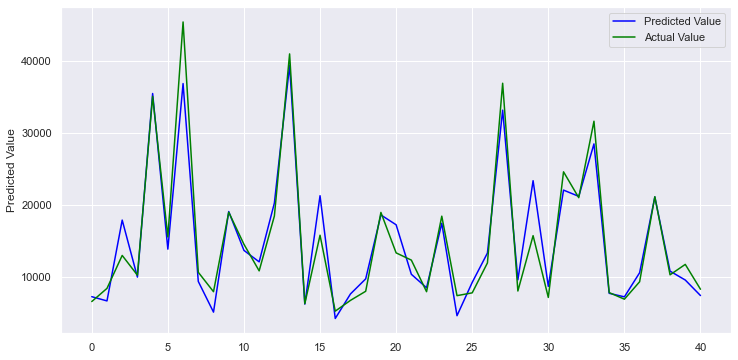

In [90]:
f, ax = plt.subplots(figsize = (12, 6))

sns.lineplot(x = data_actual_pred.index, y = 'Predicted Value', color = 'blue',
             data = data_actual_pred, ax = ax)

sns.lineplot(x = data_actual_pred.index, y = 'Actual Value', color = 'green',
             data = data_actual_pred, ax = ax)

plt.legend(['Predicted Value', 'Actual Value'])